1. 서울시 각 구별 cctv 수를 파악하고 인구대비 cctv 비율
2. 고령자/외국인의 수가 cctv 설치에 영향을 줬는가?
3. 인구대비 cctv의 적정치를 확인하고 cctv가 과하게 부족한 구를 확인

- 사용데이터
- 서울시 지자체별 cctv 현황 : './data/01. CCTV_in_Seoul.csv'
- 서울시 지자체별 인구 현황 : './data/01.population_in_Seoul.xls'

In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [5]:
# 서울시 지자체별 cctv 현황 데이터
cctv_seoul = pd.read_csv('./data/01. CCTV_in_Seoul.csv')
cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [6]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [7]:
# 컬럼명 추출
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [8]:
# 컬럼명 변경 df.rename(columns={바꿀위치:새로운값})
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},
                 inplace=True)

In [9]:
cctv_seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377


In [10]:
# 서울시 인구현황 데이터
pop_Seoul = pd.read_excel('./data/01.population_in_Seoul.xls',
                         header=2,
                         usecols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [11]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [12]:
pop_Seoul.rename(columns={'자치구':'구별','계':'인구수',
                         '계.1':'한국인','계.2':'외국인',
                         '65세이상고령자':'고령자'},inplace=True)

In [13]:
pop_Seoul.head(2)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [14]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      26 non-null     object 
 1   인구수     26 non-null     float64
 2   한국인     26 non-null     float64
 3   외국인     26 non-null     float64
 4   고령자     26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [15]:
# 첫 행이 불필요한 데이터(합계)
# drop(삭제할위치 또는 컬럼명,axis=0(행)/1(열))
# pop_Seoul.drop(['구별'],axis=1) - '구별' 열이 삭제
pop_Seoul.drop([0],inplace=True)

In [16]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 1 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [17]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [18]:
len(pop_Seoul['구별'].unique())

26

- 구별 data에 nan값이 존재 : 제거
- isnull() 함수 이용 조건 인덱싱

In [19]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [20]:
pop_Seoul.drop(26,inplace=True)

In [21]:
pop_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구별      25 non-null     object 
 1   인구수     25 non-null     float64
 2   한국인     25 non-null     float64
 3   외국인     25 non-null     float64
 4   고령자     25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


### 가공필드 생성

In [22]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구별         25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [23]:
cctv_seoul.drop('소계',axis=1,inplace=True)

In [24]:
cctv_seoul['소계'] = cctv_seoul.sum(axis=1)

C:\Users\82107\AppData\Local\Temp\ipykernel_9680\396076586.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cctv_seoul['소계'] = cctv_seoul.sum(axis=1)


In [25]:
cctv_seoul.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계
0,강남구,1292,430,584,932,3238
1,강동구,379,99,155,377,1010
2,강북구,369,120,138,204,831
3,강서구,388,258,184,81,911
4,관악구,846,260,390,613,2109


In [26]:
# 설치대수가 적은 구 (5개구)
cctv_seoul.sort_values(by='소계').head(5)

,구별,2013년도 이전,2014년,2015년,2016년,소계
9,도봉구,238,159,42,386,825
2,강북구,369,120,138,204,831
5,광진구,573,78,53,174,878
3,강서구,388,258,184,81,911
24,중랑구,509,121,177,109,916


In [27]:
# 설치대수가 많은 5개 구를 확인
cctv_seoul.sort_values(by='소계',ascending=False).head(5)

,구별,2013년도 이전,2014년,2015년,2016년,소계
0,강남구,1292,430,584,932,3238
18,양천구,1843,142,30,467,2482
14,서초구,1406,157,336,398,2297
4,관악구,846,260,390,613,2109
21,은평구,1138,224,278,468,2108


In [28]:
# Data상 최근 3개년(2014,2015,2016) 동안 cctv가 얼마나 증가했는지 확인
cctv_seoul['최근 증가율'] = (cctv_seoul['2014년'] +
                             cctv_seoul['2015년'] +
                             cctv_seoul['2016년']) / cctv_seoul['2013년도 이전'] * 100

In [29]:
cctv_seoul.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율
0,강남구,1292,430,584,932,3238,150.619195
1,강동구,379,99,155,377,1010,166.490765
2,강북구,369,120,138,204,831,125.203252
3,강서구,388,258,184,81,911,134.793814
4,관악구,846,260,390,613,2109,149.290780


In [30]:
# Data상 최근 3개년 동안 cctv 설치 증가율이 높은 3개구
cctv_seoul.sort_values(by='최근 증가율',ascending=False).head(3)

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율
22,종로구,464,314,211,630,1619,248.922414
9,도봉구,238,159,42,386,825,246.638655
12,마포구,314,118,169,379,980,212.101911


### 인구데이터

In [31]:
# 인구가 가장 많은 자치구
pop_Seoul.head(1)
pop_Seoul.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0


,구별,인구수,한국인,외국인,고령자
24,송파구,667483.0,660584.0,6899.0,72506.0
16,강서구,603772.0,597248.0,6524.0,72548.0
23,강남구,570500.0,565550.0,4950.0,63167.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


In [32]:
# 고령자 수
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)
#외국인 수 
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자
16,강서구,603772.0,597248.0,6524.0,72548.0
24,송파구,667483.0,660584.0,6899.0,72506.0
12,은평구,494388.0,489943.0,4445.0,72334.0
11,노원구,569384.0,565565.0,3819.0,71941.0
21,관악구,525515.0,507203.0,18312.0,68082.0


,구별,인구수,한국인,외국인,고령자
19,영등포구,402985.0,368072.0,34913.0,52413.0
17,구로구,447874.0,416487.0,31387.0,56833.0
18,금천구,255082.0,236353.0,18729.0,32970.0
21,관악구,525515.0,507203.0,18312.0,68082.0
6,동대문구,369496.0,354079.0,15417.0,54173.0


In [33]:
# 인구대비 고령자/외국인 비율 

pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수']*100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] /pop_Seoul['인구수']*100

In [34]:
# 고령자 비율
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)
#외국인 비율
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


## 인구대비 cctv 대수의 적정성을 확인해야 하므로
- df 병합(key='구별' 

In [35]:
data_result = pd.merge(cctv_seoul,pop_Seoul,on='구별')
data_result.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [36]:
# 불필요한 열 삭제(del 사용- 원본데이터 반영 (취소 불가능함))
# del data_result['2013년도 이전']

In [37]:
data_result.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [38]:
# del data_result['2014년']
# del data_result['2015년']
# del data_result['2016년']

In [39]:
data_result.head()

,구별,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [40]:
# 구별 컬럼을 행 인덱스로 설정
data_result.set_index('구별',inplace=True)

In [41]:
# 다수의 데이터 중에서 상관관계가 큰 데이터를 선택해서 관계 파악 
# 인구와 관련된 필드 (전체 인구수, 고령자, 외국인)와 cctv 대수 
# 0.1/0.3/0.7
np.corrcoef(data_result['소계'],data_result['인구수'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [42]:
np.corrcoef(data_result['소계'],data_result['외국인'])

array([[1.        , 0.02794959],
       [0.02794959, 1.        ]])

In [43]:
np.corrcoef(data_result['소계'],data_result['고령자'])

array([[1.        , 0.17551765],
       [0.17551765, 1.        ]])

### CCTV vs 인구 현황 시각화 

In [44]:

import matplotlib.pyplot as plt # 그래프 패키지
%matplotlib inline
# 노트북 내 out 창에서 그래프 출력

In [45]:
data_result.head()

,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,
강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [46]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='구별'>

<Figure size 720x720 with 0 Axes>

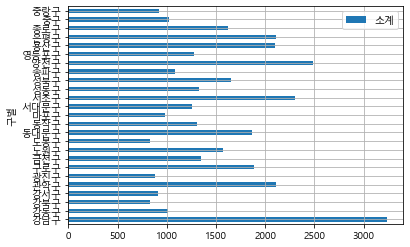

In [47]:
# 구별 cctv 대수의 차이
plt.figure(figsize=(10,10))
data_result[['소계']].plot(kind='barh',grid=True)

<AxesSubplot:ylabel='구별'>

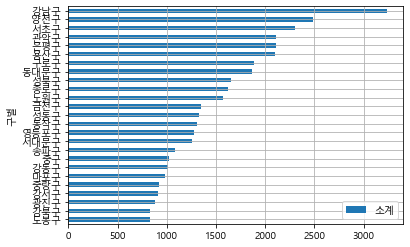

In [48]:
data_result[['소계']].sort_values(by='소계').plot(kind='barh',grid=True)
plt.show()

In [49]:
# 인구수 대비 cctv 설치 비율 계산
data_result['cctv 비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,2013년도 이전,2014년,2015년,2016년,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv 비율
구별,,,,,,,,,,,,,
강남구,1292,430,584,932,3238,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.567572
강동구,379,99,155,377,1010,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.222843
강북구,369,120,138,204,831,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.251672
강서구,388,258,184,81,911,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.150885
관악구,846,260,390,613,2109,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.401321


<AxesSubplot:ylabel='구별'>

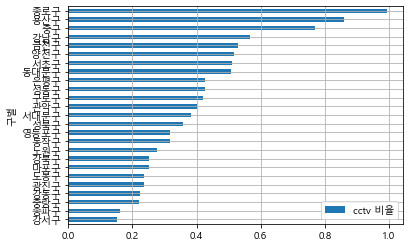

In [50]:
# 인구대비 cctv 비율에 대한 그래프
data_result[['cctv 비율']].sort_values(by='cctv 비율').plot(kind='barh',grid=True)


## 인구대비 cctv 비율은 종로/용산/중구가 월등히 높다
 - 주거지역이 적고 유동인구가 많은 대표 지역

인구수와 cctv 관계 확인(산점도)
- scatter()

Text(0.5, 0, '인구수')

Text(0, 0.5, '구별 cctv수')

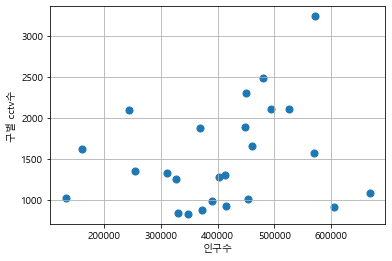

In [51]:
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('구별 cctv수')
plt.grid()
plt.show()

In [52]:

# data 저장
data_result.to_csv('./data/data_result.csv',encoding='utf-8')